<a href="https://colab.research.google.com/github/akshan-main/spamfilter/blob/main/SpamFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv('spamdata.csv')
df.head()

,IsSpam,Text
0,0,key issues going forwarda year end reviews rep...
1,0,congrats contratulations the execution the cen...
2,0,key issues going forwardall under control set...
3,0,epmi files protest entergy transcoattached our...
4,0,california power please contact kristin walsh ...


In [3]:
df.groupby('IsSpam').describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        500    499   paso firm capacity award memorandumlouise del...    2
1        500    500  take the reinsbecomeyour employer substantial ...    1

In [4]:
df = df.drop_duplicates()
df.groupby('IsSpam').describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        499    499  key issues going forwarda year end reviews rep...    1
1        500    500  take the reinsbecomeyour employer substantial ...    1

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
x = vectorizer.fit_transform(df['Text'])
y = df['IsSpam']

In [6]:
from sklearn.model_selection import train_test_split
#80% data training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [7]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

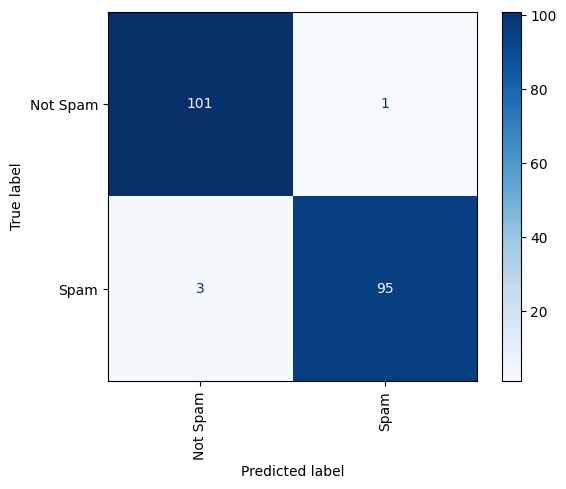

In [8]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
cmd.from_estimator(model, x_test, y_test,display_labels=['Not Spam', 'Spam'], cmap='Blues', xticks_rotation='vertical')

In [9]:
model.score(x_test, y_test)

0.98

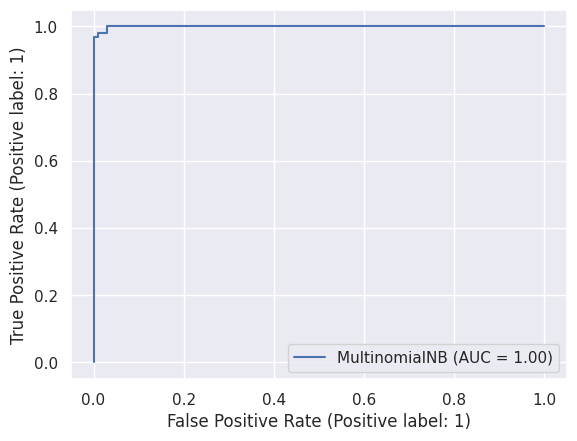

In [10]:
from sklearn.metrics import RocCurveDisplay as rcd
import seaborn as sns
sns.set()
rcd.from_estimator(model, x_test, y_test)

In [11]:
msg = 'Hi bro, what are you doing in the jungle?'
input = vectorizer.transform([msg])
model.predict(input)[0]

0

In [12]:
model.predict_proba(input)[0][0] #probability that the message is not spam

0.8248400779559149

In [13]:
msg = 'Why pay more for expensive meds when you can order them online'\
 'and save $$$?'
input = vectorizer.transform([msg])
model.predict(input)[0]

1

In [14]:
model.predict_proba(input)[0][0] #probability that the message is not spam

0.0056526163617037556

In [15]:
model.predict_proba(input)[0][1] #probability that message is not spam

0.9943473836382942

In [16]:
predictions = model.predict(input)  # for classification
probabilities = model.predict_proba(input)  # for probability estimation

# Iterate through the results for each email
for i, email in enumerate(input):
    email_prediction = predictions[i]
    email_probability = probabilities[i]